In [ ]:
%%time
# import dependencies
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.fftpack import dct, idct


def map(x0, R):
    """ Define a function called 'map' which returns the value of x1 for a given x0 and R. """
    # return R * x0 * (1 - x0]6)
    # return np.mod(R * x0 * (1 - x0) * 2**12, 1)
    # Apply the sine and cosine transformations and combine them
    y0 = x0+0.1
    x1 = R * np.sin(np.pi * x0 * x0 * (1-x0))
    y1 = R * np.cos(np.pi * y0)
    # # Combine the sine and cosine maps, then apply modulus for chaotic behavior
    z1 = np.mod((x1 + y1) * 2**12, 1)  # Adjust scale and modulus as per requirements

    return z1


def orbit(x0, R, maxiter):
    """ Define a function that returns an orbit, that is, the values of x1, x2, ..., xn starting from a given x0 and R. """
    # Initialize a list and set the first element to x0
    x = [x0]
    # Generate the full map values
    for n in range(maxiter):
        x.append(map(x[-1], R))
    return x

def xor_keys(x):
    for n in range(len(x)):
        x[n] = math.floor(x[n] * 255) % 256
    return x

# Add index and sort by the second value in each tuple
def add_index_to_map(map_matrix):
  '''Adds a index to the map matrix and returns the sorted map index values only'''
  enumerated_x = list(enumerate(x))
  # print(enumerated_x)
  enumerated_x.sort(key=lambda x: x[1])
  indexes = [index for index, _ in enumerated_x]
  return indexes

def show_image(image_path):
  # Load the image and convert to grayscale
    image = Image.open(image_path).convert('L')
    # Convert the image to a numpy array (grayscale)
    image_matrix = np.array(image)
    plt.imshow(image_matrix, cmap='gray')
    plt.axis('off')  # Turn off axis labels
    plt.show()

def flatten_image(image_path):
    """
    Flatten a grayscale image into a 1D array.

    Parameters:
    - image_path: Path to the input grayscale image.

    Returns:
    - flattened_image: Flattened 1D array of pixel values.
    - original_shape: Tuple containing the original shape of the image (for reshaping after operations).
    """
    # Load the image and convert to grayscale
    image = Image.open(image_path).convert('L')

    # Convert the image to a numpy array (grayscale)
    image_matrix = np.array(image)

    # Get the original shape of the image
    original_shape = image_matrix.shape

    # Flatten the 2D image matrix into a 1D array
    flattened_image = image_matrix.flatten()

    return flattened_image, original_shape


#encrypt fucntion
def scramble(image_path, chaotic_map_indices, output_path):
    """
    Scrambles a grayscale image based on chaotic map indices.

    Parameters:
    - image_path: Path to the input grayscale image.
    - chaotic_map_indices: List of indices generated by the chaotic map for scrambling.
    - output_path: Path to save the scrambled image.
    """

    flattened_image,orignal_shape = flatten_image(image_path)

    # Reorder the flattened image according to the chaotic map indices
    scrambled_image = np.array([flattened_image[i] for i in chaotic_map_indices])

    # Reshape the scrambled list back into the original 2D image shape
    scrambled_matrix = scrambled_image.reshape(orignal_shape)

    # Convert the scrambled matrix back to an image
    scrambled_image = Image.fromarray(np.uint8(scrambled_matrix))

    # Save the scrambled image
    scrambled_image.save(output_path)

    print(f"Scrambling complete. File saved at {output_path}")
    # show_image('scrambled_image.png')

## xor image values with map values
# def xor_with_key(img_path, key_stream, output_img_path):
#     """
#     Applies XOR operation between the scrambled image matrix and a key stream.

#     Parameters:
#     - img_path: Path to the scrambled grayscale image.
#     - key_stream: 1D numpy array representing the key stream (should match image size when flattened).
#     - output_img_path: Path to save the output XORed image.

#     Returns:
#     - None: Saves the XORed image to the specified path.
#     """
#     # Open the image and convert to grayscale
#     scrambled_image = Image.open(img_path).convert('L')
#     image_matrix = np.array(scrambled_image)


#     # Flatten the image and apply XOR with the key stream
#     image_matrix_flat = image_matrix.flatten()
#     # xor_result = np.bitwise_xor(image_matrix_flat, key_stream).astype(np.uint8)
#     # xor_result = np.mod(np.bitwise_xor(image_matrix_flat, key_stream), 256).astype(np.uint8)
#     xor_result = np.mod(np.bitwise_xor(image_matrix_flat, key_stream), 256).astype(np.uint8)

#     # xor_result = np.mod(np.bitwise_xor(, key_stream), 256).astype(np.uint8)
#     # xor_result = np.mod(np.bitwise_xor(image_matrix_flat, key_stream%256)).astype(np.uint8)

#     # Reshape the result back to the original image dimensions
#     xor_image = xor_result.reshape(image_matrix.shape)

#     # Convert the result back to an image and save
#     xor_image_pil = Image.fromarray(xor_image)
#     xor_image_pil.save(output_img_path)

#     print("XOR operation complete")
    # show_image(output_img_path)

def xor_with_key(img_path, output_img_path, iterations=1):
    """
    Applies XOR operation between the scrambled image matrix and a key stream multiple times.

    Parameters:
    - img_path: Path to the scrambled grayscale image.
    - key_stream: 1D numpy array representing the key stream (should match image size when flattened).
    - output_img_path: Path to save the output XORed image.
    - iterations: Number of times to repeat the XOR operation.

    Returns:
    - None: Saves the XORed image to the specified path.
    """
    # Open the image and convert to grayscale
    scrambled_image = Image.open(img_path).convert('L')
    image_matrix = np.array(scrambled_image)

    # Flatten the image
    image_matrix_flat = image_matrix.flatten()

    # Perform XOR multiple times
    xor_result = image_matrix_flat
    for _ in range(iterations):
        u = 3.8
        x0 = 0.7+(iterations/1000)
        map_iterations = 65535
        x = orbit(x0, u, map_iterations)
        keysforxor = xor_keys(x)
        xor_result = np.mod(np.bitwise_xor(xor_result, keysforxor), 256).astype(np.uint8)

    # Reshape the result back to the original image dimensions
    xor_image = xor_result.reshape(image_matrix.shape)

    # Convert the result back to an image and save
    xor_image_pil = Image.fromarray(xor_image)
    xor_image_pil.save(output_img_path)

    print(f"XOR operation completed {iterations} times")


# def apply_block_dct(image_path, output_dct_path, block_size, scaling_factor=0.7):
#     """
#     Applies block-based DCT to an image with scaling on high-frequency components.

#     Parameters:
#     - image_path: Path to the input grayscale image.
#     - output_dct_path: Path to save the DCT-transformed image as PNG.
#     - block_size: Size of the DCT block (e.g., 8x8).
#     - scaling_factor: Factor to reduce high-frequency components in each block (0 < scaling_factor <= 1).
#     """
#     # Load image and convert to grayscale
#     image = Image.open(image_path).convert('L')
#     image_array = np.array(image)
#     rows, cols = image_array.shape

#     # Prepare an array to hold the transformed DCT image
#     dct_image = np.zeros_like(image_array, dtype=np.float32)

#     # Define a scaling mask that retains low-frequency components more strongly
#     mask = np.ones((block_size, block_size)) * scaling_factor
#     mask[:block_size//4, :block_size//4] = 1  # Keep low frequencies intact

#     # Apply block-wise DCT and scaling
#     for i in range(0, rows, block_size):
#         for j in range(0, cols, block_size):
#             # Extract the block
#             block = image_array[i:i+block_size, j:j+block_size]

#             # Apply 2D DCT on the block
#             dct_block = dct(dct(block.T, norm='ortho').T, norm='ortho')

#             # Apply the scaling mask
#             dct_block *= mask

#             # Store the transformed block back into the dct_image array
#             dct_image[i:i+block_size, j:j+block_size] = dct_block

#     # Normalize the DCT image for visualization and save as PNG
#     dct_image_normalized = np.clip((dct_image - np.min(dct_image)) /
#                                    (np.max(dct_image) - np.min(dct_image)) * 255, 0, 255).astype(np.uint8)
#     dct_image_png = Image.fromarray(dct_image_normalized)
#     dct_image_png.save(output_dct_path)

#     print(f"Block DCT complete. Transformed image saved as PNG at {output_dct_path}")
#     return dct_image

# # Apply IDCT to reconstruct the image
# def apply_block_idct(dct_image, output_img_path, block_size=8):
#     """
#     Applies block-based IDCT to reconstruct an image from DCT coefficients.

#     Parameters:
#     - dct_image: 2D array of DCT coefficients.
#     - output_img_path: Path to save the reconstructed image.
#     - block_size: Size of the DCT block (e.g., 8x8).
#     """
#     rows, cols = dct_image.shape
#     reconstructed_image = np.zeros_like(dct_image)

#     # Perform block-wise IDCT
#     for i in range(0, rows, block_size):
#         for j in range(0, cols, block_size):
#             # Extract the DCT block
#             dct_block = dct_image[i:i+block_size, j:j+block_size]

#             # Apply 2D IDCT on the block
#             idct_block = idct(idct(dct_block.T, norm='ortho').T, norm='ortho')

#             # Store the reconstructed block back into the reconstructed_image array
#             reconstructed_image[i:i+block_size, j:j+block_size] = idct_block

#     # Clip values to 0-255 range and convert to uint8
#     reconstructed_image = np.clip(reconstructed_image, 0, 255).astype(np.uint8)
#     idct_image = Image.fromarray(reconstructed_image)
#     idct_image.save(output_img_path)

#     print(f"Block IDCT complete. Reconstructed image saved at {output_img_path}")






### Set initial parameters
u = 3.8
# u=1.8
x0 = 0.7
iterations = 65535

# Generate map values
x = orbit(x0, u, iterations)
indexes1 = add_index_to_map(x)
# print(indexes)


# show_image('lena_grayscale.png')
# og_img = flatten_image('lena_grayscale.png')
input_image = "lena_grayscale.png"
# xor_with_key(input_image, indexes1, 'xor_first_time.png')
# # apply_block_dct('lena_grayscale.png', 'dct_min_zero_block_image.png', block_size=8, scaling_factor=0.9)
# scramble('xor_first_time.png', indexes1, 'scrambled_image.png')
# xor_with_key('scrambled_image.png', indexes1, 'xor2.png')
xor_with_key(input_image, 'xor_first_time.png',10)
scramble('xor_first_time.png', indexes1,'scrambled_image.png')
# xor_with_key('scrambled_image.png', 'xor2.png',10)

rng_xor_key,trash = flatten_image("dct_min_zero_block_image.png")



# keys = generate_key_stream_from_chaos(img_shape, x0, u, iterations)
# xor_with_key('scrambled_image.png', keys,'xor_second_time.png')

XOR operation completed 10 times
Scrambling complete. File saved at scrambled_image.png
XOR operation completed 10 times
CPU times: user 7.42 s, sys: 118 µs, total: 7.42 s
Wall time: 7.43 s


In [ ]:
# rng_xor_key = flatten_image("crosses.png")

# print(rng_xor_key)
# print(flatten_image('xor2.png'))
# xor_with_key('xor2.png', rng_xor_key, 'xor3.png')
# print(flatten_image('xor3.png'))
def uaci(path1, path2):
    """
    Calculate the UACI (Unified Average Changing Intensity) between two grayscale images.

    Parameters:
    - path1: Path to the first image (original).
    - path2: Path to the second image (encrypted).

    Returns:
    - uaci_value: UACI value as a percentage.
    """

    # Flatten both images using the provided flatten_image function
    image1_flat, _ = flatten_image(path1)
    image2_flat, _ = flatten_image(path2)

    # Ensure both images have the same number of pixels
    if len(image1_flat) != len(image2_flat):
        raise ValueError("Images must have the same dimensions for UACI calculation.")

    # Total number of pixels (assuming 256x256 image)
    total_pixels = len(image1_flat)

    # Calculate the UACI value
    value = np.sum(np.abs(image1_flat.astype(int) - image2_flat.astype(int)))
    uaci_value = (value / (total_pixels * 255)) * 100

    return uaci_value

# Example usage
uaci_value = uaci(input_image, 'scrambled_image.png')
# uaci_value = uaci('lena_grayscale.png', 'scrambled_image.png')
print(f"UACI: {uaci_value}%")

UACI: 21.730885225183822%


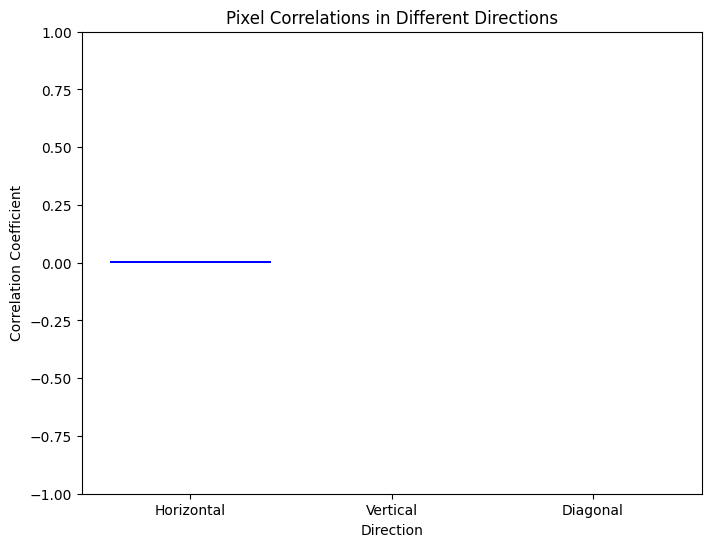

0.007149202514315945
-0.0010405691948292763
-0.0029684232486836765


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def calculate_correlation(pairs):
    """Calculate the correlation coefficient between neighboring pixel pairs."""
    X = np.array([p[0] for p in pairs])
    Y = np.array([p[1] for p in pairs])
    cov_xy = np.cov(X, Y)[0, 1]
    var_x = np.var(X)
    var_y = np.var(Y)
    correlation = cov_xy / np.sqrt(var_x * var_y)
    return correlation

def get_pixel_pairs(image_array, direction):
    """Get pixel pairs based on the specified direction."""
    pairs = []
    h, w = image_array.shape

    if direction == 'horizontal':
        for i in range(h):
            for j in range(w - 1):  # Exclude last column
                pairs.append((image_array[i, j], image_array[i, j + 1]))

    elif direction == 'vertical':
        for i in range(h - 1):  # Exclude last row
            for j in range(w):
                pairs.append((image_array[i, j], image_array[i + 1, j]))

    elif direction == 'diagonal':
        for i in range(h - 1):  # Exclude last row and column
            for j in range(w - 1):
                pairs.append((image_array[i, j], image_array[i + 1, j + 1]))

    return pairs

def calculate_and_plot_correlations(image_path):
    """Calculate horizontal, vertical, and diagonal correlations and plot them."""
    # Load and convert the image to grayscale
    image = Image.open(image_path).convert('L')
    image_array = np.array(image)

    # Calculate correlations
    horizontal_pairs = get_pixel_pairs(image_array, 'horizontal')
    vertical_pairs = get_pixel_pairs(image_array, 'vertical')
    diagonal_pairs = get_pixel_pairs(image_array, 'diagonal')

    horizontal_corr = calculate_correlation(horizontal_pairs)
    vertical_corr = calculate_correlation(vertical_pairs)
    diagonal_corr = calculate_correlation(diagonal_pairs)

    # Plot results
    directions = ['Horizontal', 'Vertical', 'Diagonal']
    correlations = [horizontal_corr, vertical_corr, diagonal_corr]

    plt.figure(figsize=(8, 6))
    plt.bar(directions, correlations, color=['blue', 'green', 'red'])
    plt.title('Pixel Correlations in Different Directions')
    plt.xlabel('Direction')
    plt.ylabel('Correlation Coefficient')
    plt.ylim(-1, 1)  # Correlation coefficient range
    plt.show()

    # Print correlation values
    print(horizontal_corr)
    print(vertical_corr)
    print(diagonal_corr)

# Example usage
calculate_and_plot_correlations('xor2.png')


In [ ]:
import numpy as np

def calculate_npcr(image_path1, image_path2):
    """
    Calculate the NPCR (Number of Pixels Change Rate) between two grayscale images.

    Parameters:
    - image_path1: Path to the first image (original).
    - image_path2: Path to the second image (encrypted).

    Returns:
    - npcr_value: NPCR value as a percentage.
    """

    # Flatten both images using the provided flatten_image function
    image1_flat, _ = flatten_image(image_path1)
    image2_flat, _ = flatten_image(image_path2)

    # Ensure both images have the same size
    if image1_flat.shape != image2_flat.shape:
        raise ValueError("Images must have the same dimensions for NPCR calculation.")

    # Calculate the difference matrix (D(i,j)) as described in the formula
    diff_matrix = np.where(image1_flat != image2_flat, 1, 0)

    # Calculate NPCR
    npcr_value = (np.sum(diff_matrix) / len(image1_flat)) * 100

    return npcr_value

# Example usage
original_image_path = input_image
encrypted_image_path = 'xor2.png'
npcr_value = calculate_npcr(original_image_path, encrypted_image_path)
print(f"NPCR: {npcr_value}%")

def uaci(path1, path2):
    """
    Calculate the UACI (Unified Average Changing Intensity) between two grayscale images.

    Parameters:
    - path1: Path to the first image (original).
    - path2: Path to the second image (encrypted).

    Returns:
    - uaci_value: UACI value as a percentage.
    """

    # Flatten both images using the provided flatten_image function
    image1_flat, _ = flatten_image(path1)
    image2_flat, _ = flatten_image(path2)

    # Ensure both images have the same number of pixels
    if len(image1_flat) != len(image2_flat):
        raise ValueError("Images must have the same dimensions for UACI calculation.")

    # Total number of pixels (assuming 256x256 image)
    total_pixels = len(image1_flat)

    # Calculate the UACI value
    value = np.sum(np.abs(image1_flat.astype(int) - image2_flat.astype(int)))
    uaci_value = (value / (total_pixels * 255)) * 100

    return uaci_value

# Example usage
uaci_value = uaci(input_image, 'xor2.png')
# uaci_value = uaci('lena_grayscale.png', 'scrambled_image.png')
print(f"UACI: {uaci_value}%")
import numpy as np

def calculate_entropy(flattened_image):
    """
    Calculate the entropy of a flattened grayscale image.

    Parameters:
    - flattened_image: 1D array of pixel values.

    Returns:
    - entropy: The entropy value of the image.
    """
    # Calculate the histogram (pixel value distribution)
    histogram, _ = np.histogram(flattened_image, bins=256, range=(0, 255), density=True)

    # Filter out zero probabilities to avoid log(0)
    non_zero_probs = histogram[histogram > 0]

    # Calculate entropy using Shannon's formula
    entropy = -np.sum(non_zero_probs * np.log2(non_zero_probs))

    return entropy

# Example usage:
flattened_image1, _ = flatten_image(input_image)  # Replace with your image
flattened_image2, _ = flatten_image('xor2.png')  # Replace with your image
entropy_value = calculate_entropy(flattened_image1)
print(f"Entropy: {entropy_value}")
entropy_value = calculate_entropy(flattened_image2)
print(f"Entropy: {entropy_value}")

import cv2
import numpy as np

def getPSNR(I1, I2):
    '''
    :param I1: represents original image matrix
    :param I2: represents degraded image matrix
    :return: psnr score
    '''
    # mse calculation
    s1 = cv2.absdiff(I1, I2)
    # cannot make a square on 8 bits
    s1 = np.float32(s1)
    s1 = s1 * s1
    sse = s1.sum()

    # return zero if the difference is extremely small
    if sse <= 1e-10:
        return 0
    else:
        # Handle grayscale or color images
        shape = I1.shape

        mse = sse / (255 * 255)


        # Here 255 denotes the maximum possible value in an 8-bit channel
        psnr = 10.0 * np.log10((255 * 255) / mse)
        return psnr

# Load and compare images
image_mat1, shape1 = flatten_image(input_image)
image_mat2, shape2 = flatten_image('xor2.png')

# Compute PSNR
print(getPSNR(image_mat1, image_mat2))

import numpy as np
from PIL import Image

def compute_correlation(image1_path, image2_path):
    """
    Compute the Pearson correlation coefficient between two grayscale images.

    Parameters:
    - image1_path: Path to the first image (original).
    - image2_path: Path to the second image (encrypted).

    Returns:
    - correlation: Pearson correlation coefficient between the two images.
    """
    # Flatten both images using the provided flatten_image function
    image1_flattened, _ = flatten_image(image1_path)
    image2_flattened, _ = flatten_image(image2_path)

    # Calculate the means of both flattened images
    mean1 = np.mean(image1_flattened)
    mean2 = np.mean(image2_flattened)

    # Compute the numerator of the Pearson correlation formula
    numerator = np.sum((image1_flattened - mean1) * (image2_flattened - mean2))

    # Compute the denominator
    denominator = np.sqrt(np.sum((image1_flattened - mean1) ** 2) * np.sum((image2_flattened - mean2) ** 2))

    # Avoid division by zero
    if denominator == 0:
        return 0

    # Compute the Pearson correlation coefficient
    correlation = numerator / denominator

    return correlation

# Example usage:
original_image = input_image
encrypted_image = 'xor2.png'
correlation_value = compute_correlation(original_image, encrypted_image)
print(f"Correlation: {correlation_value}")

import cv2
import numpy as np

def getSSISM(I1, I2):
    '''
    :param i1: represents original image matrix
    :param i2: represents degraded image matrix
    :return: SSIM score
    '''
    # Constants for luminance and contrast
    C1 = 6.5025
    C2 = 58.5225
    # C3=C2/2

    # converting to float for squaring
    I1 = np.float32(I1)
    I2 = np.float32(I2)
    I2_2 = I2 * I2
    I1_2 = I1 * I1
    I1_I2 = I1 * I2

    # applying GaussianBlur with (11,11) kernel where mean=st_dev=1.5
    mu1 = cv2.GaussianBlur(I1, (11, 11), 1.5)
    mu2 = cv2.GaussianBlur(I2, (11, 11), 1.5)
    mu1_2 = mu1 * mu1
    mu2_2 = mu2 * mu2
    mu1_mu2 = mu1 * mu2

    sigma1_2 = cv2.GaussianBlur(I1_2, (11, 11), 1.5)
    sigma1_2 -= mu1_2
    sigma2_2 = cv2.GaussianBlur(I2_2, (11, 11), 1.5)
    sigma2_2 -= mu2_2
    sigma12 = cv2.GaussianBlur(I1_I2, (11, 11), 1.5)
    sigma12 -= mu1_mu2

    t1 = 2 * mu1_mu2 + C1
    t2 = 2 * sigma12 + C2
    t3 = t1 * t2  # t3 = ((2*mu1_mu2 + C1).*(2*sigma12 + C2))
    t1 = mu1_2 + mu2_2 + C1
    t2 = sigma1_2 + sigma2_2 + C2
    t1 = t1 * t2  # t1 =((mu1_2 + mu2_2 + C1).*(sigma1_2 + sigma2_2 + C2))
    ssim_map = cv2.divide(t3, t1)
    ssim = cv2.mean(ssim_map)
    return ssim

image_mat1,shape1 = flatten_image(input_image)
image_mat2,shape2 = flatten_image('xor2.png')
print(getSSISM(image_mat1,image_mat2))

NPCR: 99.62005615234375%
UACI: 28.721660539215687%
Entropy: 6.469406615872275
Entropy: 8.023070893017442
9.1595380468433
Correlation: -0.002747511726731336
(0.013671304838376436, 0.0, 0.0, 0.0)


In [ ]:
%%time
def unscramble(encrypted_image_path, chaotic_map_indices, output_path):
    """
    Decrypts a scrambled grayscale image based on the original chaotic map indices.

    Parameters:
    - encrypted_image_path: Path to the scrambled (encrypted) grayscale image.
    - chaotic_map_indices: List of indices generated by the chaotic map used for scrambling.
    - output_path: Path to save the unscrambled (decrypted) image.
    """

    # Flatten the 2D scrambled matrix into a 1D array
    scrambled_flattened,shape = flatten_image(encrypted_image_path)

    # Initialize an array for the decrypted image (same size as the scrambled_flattened array)
    decrypted_image = np.zeros_like(scrambled_flattened)

    # Reverse the scrambling process by placing the scrambled pixels back to their original positions
    for i, index in enumerate(chaotic_map_indices):
        decrypted_image[index] = scrambled_flattened[i]

    # Reshape the decrypted 1D array back into the original 2D image shape
    decrypted_matrix = decrypted_image.reshape(shape)

    # Convert the decrypted matrix back to an image
    decrypted_image = Image.fromarray(np.uint8(decrypted_matrix))

    # Save the decrypted image
    decrypted_image.save(output_path)

    print(f"Descrambling complete. File saved at {output_path}")
    # show_image(f'{output_path}')

xor_with_key('xor2.png', indexes1,'xor1.png')
unscramble('xor1.png', indexes1, 'unscrambled.png')
xor_with_key('unscrambled.png', indexes1,'decrypted.png')
# unscramble('descrambled_image.png', indexes, 'decrypted_unscrambled_image.png')

XOR operation complete
Descrambling complete. File saved at unscrambled.png
XOR operation complete
CPU times: user 62.7 ms, sys: 1.74 ms, total: 64.4 ms
Wall time: 64.1 ms


### A Block for Testing new code


In [ ]:
def uaci(path1, path2):
    """
    Calculate the UACI (Unified Average Changing Intensity) between two grayscale images.

    Parameters:
    - path1: Path to the first image (original).
    - path2: Path to the second image (encrypted).

    Returns:
    - uaci_value: UACI value as a percentage.
    """

    # Flatten both images using the provided flatten_image function
    image1_flat, _ = flatten_image(path1)
    image2_flat, _ = flatten_image(path2)

    # Ensure both images have the same number of pixels
    if len(image1_flat) != len(image2_flat):
        raise ValueError("Images must have the same dimensions for UACI calculation.")

    # Total number of pixels (assuming 256x256 image)
    total_pixels = len(image1_flat)

    # Calculate the UACI value
    value = np.sum(np.abs(image1_flat.astype(int) - image2_flat.astype(int)))
    uaci_value = (value / (total_pixels * 255)) * 100

    return uaci_value

# Example usage
uaci_value = uaci(input_image, 'xor2.png')
# uaci_value = uaci('lena_grayscale.png', 'scrambled_image.png')
print(f"UACI: {uaci_value}%")

UACI: 28.658997778799016%


In [ ]:
import numpy as np

def calculate_entropy(flattened_image):
    """
    Calculate the entropy of a flattened grayscale image.

    Parameters:
    - flattened_image: 1D array of pixel values.

    Returns:
    - entropy: The entropy value of the image.
    """
    # Calculate the histogram (pixel value distribution)
    histogram, _ = np.histogram(flattened_image, bins=256, range=(0, 255), density=True)

    # Filter out zero probabilities to avoid log(0)
    non_zero_probs = histogram[histogram > 0]

    # Calculate entropy using Shannon's formula
    entropy = -np.sum(non_zero_probs * np.log2(non_zero_probs))

    return entropy

# Example usage:
flattened_image1, _ = flatten_image(input_image)  # Replace with your image
flattened_image2, _ = flatten_image('xor2.png')  # Replace with your image
entropy_value = calculate_entropy(flattened_image1)
print(f"Entropy: {entropy_value}")
entropy_value = calculate_entropy(flattened_image2)
print(f"Entropy: {entropy_value}")

Entropy: 6.469406615872275
Entropy: 8.023110674426245


In [ ]:
import cv2
import numpy as np

def getPSNR(I1, I2):
    '''
    :param I1: represents original image matrix
    :param I2: represents degraded image matrix
    :return: psnr score
    '''
    # mse calculation
    s1 = cv2.absdiff(I1, I2)
    # cannot make a square on 8 bits
    s1 = np.float32(s1)
    s1 = s1 * s1
    sse = s1.sum()

    # return zero if the difference is extremely small
    if sse <= 1e-10:
        return 0
    else:
        # Handle grayscale or color images
        shape = I1.shape

        mse = sse / (255 * 255)


        # Here 255 denotes the maximum possible value in an 8-bit channel
        psnr = 10.0 * np.log10((255 * 255) / mse)
        return psnr

# Load and compare images
image_mat1, shape1 = flatten_image(input_image)
image_mat2, shape2 = flatten_image('xor2.png')

# Compute PSNR
print(getPSNR(image_mat1, image_mat2))

5.89470927229261


In [ ]:
import numpy as np
from PIL import Image

def compute_correlation(image1_path, image2_path):
    """
    Compute the Pearson correlation coefficient between two grayscale images.

    Parameters:
    - image1_path: Path to the first image (original).
    - image2_path: Path to the second image (encrypted).

    Returns:
    - correlation: Pearson correlation coefficient between the two images.
    """
    # Flatten both images using the provided flatten_image function
    image1_flattened, _ = flatten_image(image1_path)
    image2_flattened, _ = flatten_image(image2_path)

    # Calculate the means of both flattened images
    mean1 = np.mean(image1_flattened)
    mean2 = np.mean(image2_flattened)

    # Compute the numerator of the Pearson correlation formula
    numerator = np.sum((image1_flattened - mean1) * (image2_flattened - mean2))

    # Compute the denominator
    denominator = np.sqrt(np.sum((image1_flattened - mean1) ** 2) * np.sum((image2_flattened - mean2) ** 2))

    # Avoid division by zero
    if denominator == 0:
        return 0

    # Compute the Pearson correlation coefficient
    correlation = numerator / denominator

    return correlation

# Example usage:
original_image = input_image
encrypted_image = 'xor2.png'
correlation_value = compute_correlation(original_image, encrypted_image)
print(f"Correlation: {correlation_value}")

Correlation: -0.0066363587364865854


In [ ]:
import cv2
import numpy as np

def getSSISM(I1, I2):
    '''
    :param i1: represents original image matrix
    :param i2: represents degraded image matrix
    :return: SSIM score
    '''
    # Constants for luminance and contrast
    C1 = 6.5025
    C2 = 58.5225
    # C3=C2/2

    # converting to float for squaring
    I1 = np.float32(I1)
    I2 = np.float32(I2)
    I2_2 = I2 * I2
    I1_2 = I1 * I1
    I1_I2 = I1 * I2

    # applying GaussianBlur with (11,11) kernel where mean=st_dev=1.5
    mu1 = cv2.GaussianBlur(I1, (11, 11), 1.5)
    mu2 = cv2.GaussianBlur(I2, (11, 11), 1.5)
    mu1_2 = mu1 * mu1
    mu2_2 = mu2 * mu2
    mu1_mu2 = mu1 * mu2

    sigma1_2 = cv2.GaussianBlur(I1_2, (11, 11), 1.5)
    sigma1_2 -= mu1_2
    sigma2_2 = cv2.GaussianBlur(I2_2, (11, 11), 1.5)
    sigma2_2 -= mu2_2
    sigma12 = cv2.GaussianBlur(I1_I2, (11, 11), 1.5)
    sigma12 -= mu1_mu2

    t1 = 2 * mu1_mu2 + C1
    t2 = 2 * sigma12 + C2
    t3 = t1 * t2  # t3 = ((2*mu1_mu2 + C1).*(2*sigma12 + C2))
    t1 = mu1_2 + mu2_2 + C1
    t2 = sigma1_2 + sigma2_2 + C2
    t1 = t1 * t2  # t1 =((mu1_2 + mu2_2 + C1).*(sigma1_2 + sigma2_2 + C2))
    ssim_map = cv2.divide(t3, t1)
    ssim = cv2.mean(ssim_map)
    return ssim

image_mat1,shape1 = flatten_image(input_image)
image_mat2,shape2 = flatten_image('xor2.png')
print(getSSISM(image_mat1,image_mat2))

# image_mat3,shape3 = flatten_image('aes_encrypted_image.png')
# print(getSSISM(image_mat1,image_mat3))

(0.006183609769948806, 0.0, 0.0, 0.0)


In [ ]:
print(len(x))

65536


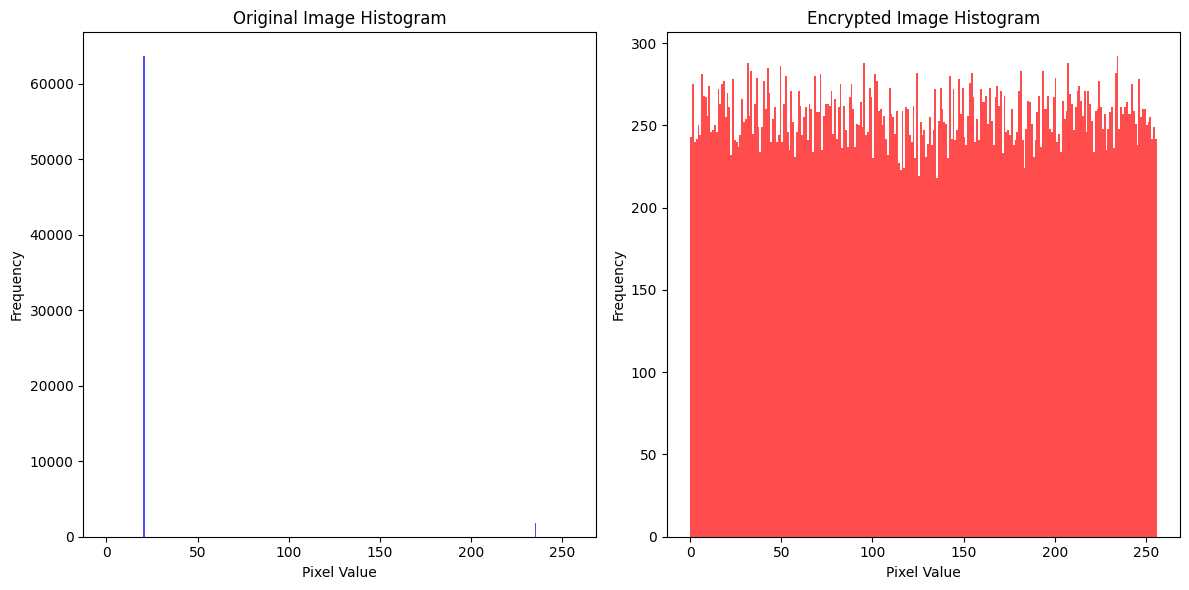

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def plot_histograms(original_image_path, encrypted_image_path):
    """
    Plots the histograms of the original and AES-encrypted grayscale images.

    Parameters:
    - original_image_path: Path to the original grayscale image.
    - encrypted_image_path: Path to the AES-encrypted grayscale image.
    """
    # Load the original image and convert to grayscale
    original_image = Image.open(original_image_path).convert('L')
    original_image_array = np.array(original_image)

    # Load the encrypted image and convert to grayscale
    encrypted_image = Image.open(encrypted_image_path).convert('L')
    encrypted_image_array = np.array(encrypted_image)

    # Ensure pixel values are within the range [0, 255]
    original_image_array = np.clip(original_image_array, 0, 255)
    encrypted_image_array = np.clip(encrypted_image_array, 0, 255)

    # Plot histograms
    plt.figure(figsize=(12, 6))

    # Original image histogram
    plt.subplot(1, 2, 1)
    plt.hist(original_image_array.flatten(), bins=256, range=(0, 256), color='blue', alpha=0.7)
    plt.title('Original Image Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    # Encrypted image histogram
    plt.subplot(1, 2, 2)
    plt.hist(encrypted_image_array.flatten(), bins=256, range=(0, 256), color='red', alpha=0.7)
    plt.title('Encrypted Image Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    # Show the histograms
    plt.tight_layout()
    plt.show()

# Example usage
plot_histograms(input_image, 'xor2.png')


In [ ]:
def uaci(path1,path2):
  image1_flat, _ = flatten_image(path1)
  image2_flat, _ = flatten_image(path2)
  value = 0
  for y in range(256):
    for x in range(256):
      value+=(abs(int(image1_flat[y])-int(image2_flat[x])))
  value = value/(65536*256)
  return value

# print(uaci('lena_grayscale.png','aes_encrypted_image.png'))
print(uaci('camera.png','scrambled_image.png'))


0.2818988561630249


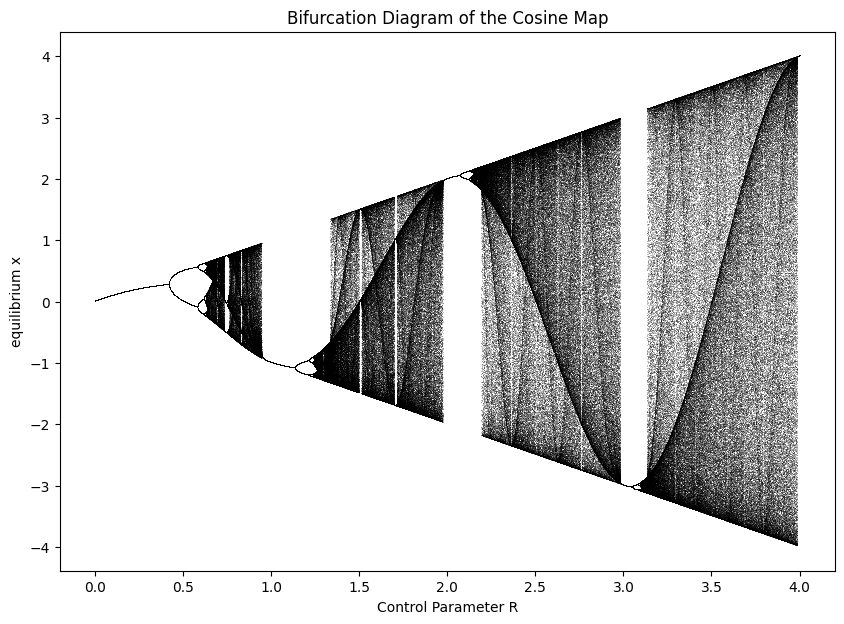

In [ ]:
map_key = sorted(x)
def any_map(x, u):
    """
    Extended logistic map function with a factor of 2^12 and modulo 1 operation.

    Parameters:
    - x: Current state.
    - u: Control parameter.

    Returns:
    - Updated state based on the modified logistic map equation.
    """
    y = x
    x1 = u * np.cos(np.pi *x)
    # y1 = u * np.cos(np.pi * y)

    # Combine the sine and cosine maps, then apply modulus for chaotic behavior
    # z1 = np.mod((x1 + y1) * 2**12, 1)  # Adjust scale and modulus as per requirements
    # z1 = x1 + y1
    return x1
    # return u * x * (1 - x)


def bifurcation_diagram(r_min, r_max, num_r, iterations, last):
    """
    Plots the bifurcation diagram for the extended logistic map.

    Parameters:
    - r_min: Minimum value of the control parameter u.
    - r_max: Maximum value of the control parameter u.
    - num_r: Number of u values to sample.
    - iterations: Number of iterations for each u value.
    - last: Number of points to plot after the transient behavior.
    """
    r_values = np.linspace(r_min, r_max, num_r)
    x = 1e-5 * np.ones(num_r)  # Initial condition

    plt.figure(figsize=(10, 7))
    for i in range(iterations):
        x = any_map(x, r_values)
        if i >= (iterations - last):
            plt.plot(r_values, x, ',k', alpha=0.25)  # Plot the stable points

    plt.title("Bifurcation Diagram of the Cosine Map")
    plt.xlabel("Control Parameter R")
    plt.ylabel("equilibrium x")
    plt.show()

# Parameters for the bifurcation diagram
r_min = 0  # Starting value of u
r_max = 4.0   # Ending value of u
num_r = 10000 # Number of u values to sample
iterations = 1000  # Total number of iterations
last = 100  # Number of points to plot after the transient behavior


# Generate the bifurcation diagram for the extended logistic map
bifurcation_diagram(r_min, r_max, num_r, iterations, last)

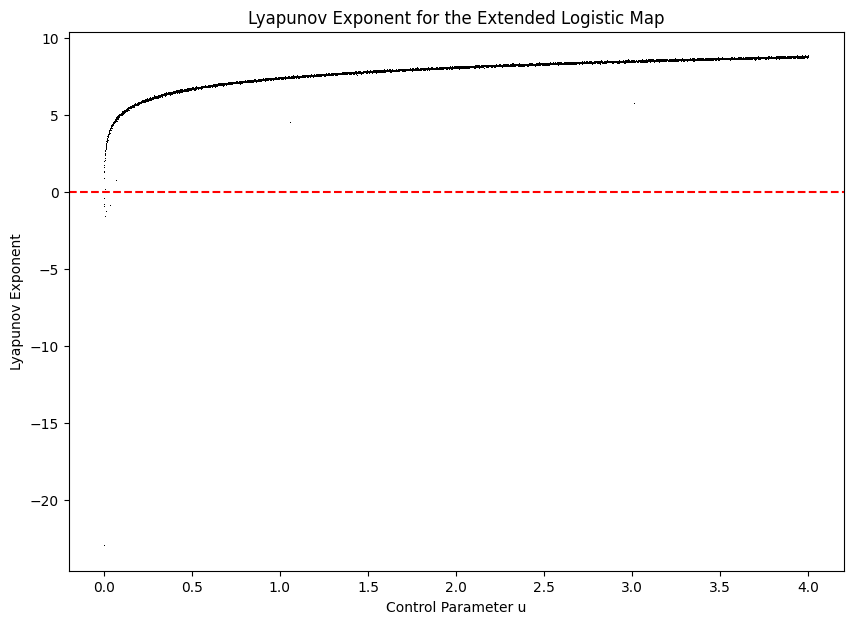

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def extended_logistic_map(x, u):
    """
    Extended logistic map function with a factor of 2^12 and modulo 1 operation.

    Parameters:
    - x: Current state.
    - u: Control parameter.

    Returns:
    - Updated state based on the modified logistic map equation.
    """
    return np.mod(u * x * (1 - x) * 2**12, 1)

def logistic_map_derivative(x, u):
    """
    Derivative of the extended logistic map with respect to x.

    Parameters:
    - x: Current state.
    - u: Control parameter.

    Returns:
    - Derivative of the extended logistic map.
    """
    return np.abs(u * (1 - 2 * x) * 2**12)



def lyapunov_exponent(u, iterations=1000, transient=100):
    """
    Calculate the Lyapunov exponent for a given control parameter u.

    Parameters:
    - u: Control parameter.
    - iterations: Number of total iterations.
    - transient: Number of initial iterations to discard (transient behavior).

    Returns:
    - Lyapunov exponent for the given control parameter u.
    """
    x = 1e-5  # Initial condition
    lyapunov_sum = 0

    for i in range(iterations):
        x = extended_logistic_map(x, u)
        if i >= transient:  # Ignore transient iterations
            derivative = logistic_map_derivative(x, u)
            if derivative == 0:
                derivative = 1e-10  # To avoid log(0) errors
            lyapunov_sum += np.log(derivative)

    # Average over iterations to get the exponent
    return lyapunov_sum / (iterations - transient)

def plot_lyapunov_exponent(r_min, r_max, num_r, iterations=1000, transient=1):
    """
    Plot the Lyapunov exponent as a function of the control parameter u.

    Parameters:
    - r_min: Minimum value of the control parameter u.
    - r_max: Maximum value of the control parameter u.
    - num_r: Number of u values to sample.
    - iterations: Number of total iterations for each u value.
    - transient: Number of initial iterations to discard.
    """
    r_values = np.linspace(r_min, r_max, num_r)
    lyapunov_values = []

    for u in r_values:
        lyapunov_values.append(lyapunov_exponent(u, iterations, transient))

    plt.figure(figsize=(10, 7))
    plt.plot(r_values, lyapunov_values, ',k')
    plt.axhline(0, color='r', linestyle='--')  # Reference line for chaos (Lyapunov > 0)
    plt.title("Lyapunov Exponent for the Extended Logistic Map")
    plt.xlabel("Control Parameter u")
    plt.ylabel("Lyapunov Exponent")
    plt.show()

# Parameters for Lyapunov exponent plot
r_min = 0  # Starting value of u
r_max = 4.0   # Ending value of u
num_r = 10000 # Number of u values to sample
iterations = 1000  # Total number of iterations
transient = 100  # Transient iterations to discard

# Plot the Lyapunov exponent for the extended logistic map
plot_lyapunov_exponent(r_min, r_max, num_r, iterations, transient)


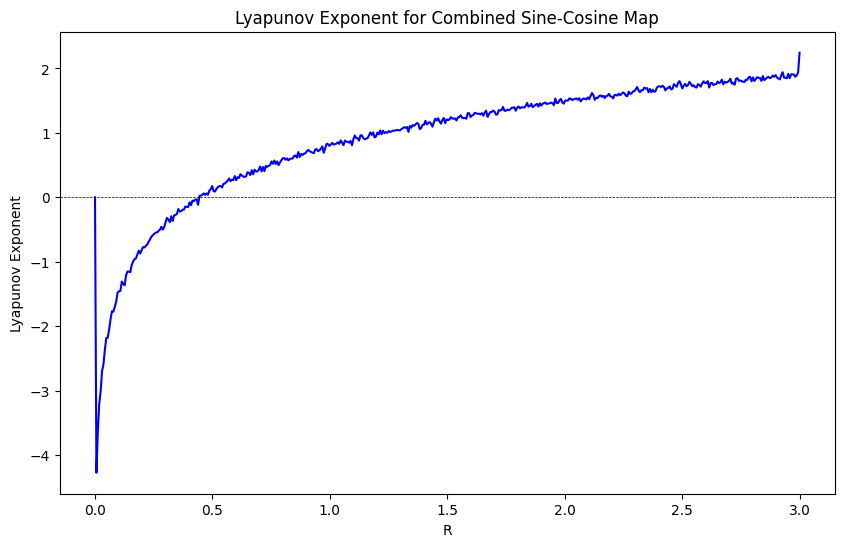

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def combined_map(x0, y0, R):
    """
    Define the combined sine-cosine chaotic map based on sine and cosine maps
    for given initial values x0, y0, and parameter R.
    """
    x1 = R * np.sin(np.pi * x0)
    y1 = R * np.cos(np.pi * y0)
    z1 = np.mod((x1 + y1) * 2**12, 1)
    return z1

def lyapunov_exponent_combined_map(R_min, R_max, steps, iterations=1000, x0=0.5, y0=0.5):
    """
    Calculate and plot the Lyapunov exponent for a range of R values for the combined map.

    Parameters:
    - R_min: Minimum value of parameter R
    - R_max: Maximum value of parameter R
    - steps: Number of steps for R values between R_min and R_max
    - iterations: Number of iterations for each R value to estimate Lyapunov exponent
    - x0, y0: Initial conditions for the chaotic map

    Returns:
    - Plot of Lyapunov exponent vs R values
    """
    R_values = np.linspace(R_min, R_max, steps)
    lyapunov_exponents = []

    for R in R_values:
        x, y = x0, y0
        sum_lyapunov = 0

        for _ in range(iterations):
            # Calculate the next state using the combined map
            z_next = combined_map(x, y, R)

            # Calculate derivative approximation (sensitivity to initial conditions)
            dx = R * np.pi * np.cos(np.pi * x)
            dy = -R * np.pi * np.sin(np.pi * y)
            derivative = abs(dx + dy)

            # Ensure we don’t take the log of zero or negative values
            if derivative > 0:
                sum_lyapunov += np.log(derivative)

            # Update x and y for the next iteration
            x, y = z_next, z_next  # Feed the output back as new initial values

        # Calculate the average Lyapunov exponent for the current R
        lyapunov_exponents.append(sum_lyapunov / iterations)

    # Plot Lyapunov exponent vs R
    plt.figure(figsize=(10, 6))
    plt.plot(R_values, lyapunov_exponents, color='blue')
    plt.xlabel("R")
    plt.ylabel("Lyapunov Exponent")
    plt.title("Lyapunov Exponent for Combined Sine-Cosine Map")
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.show()

# Example usage:
lyapunov_exponent_combined_map(R_min=0, R_max=3, steps=500, iterations=1000, x0=0.5, y0=0.5)


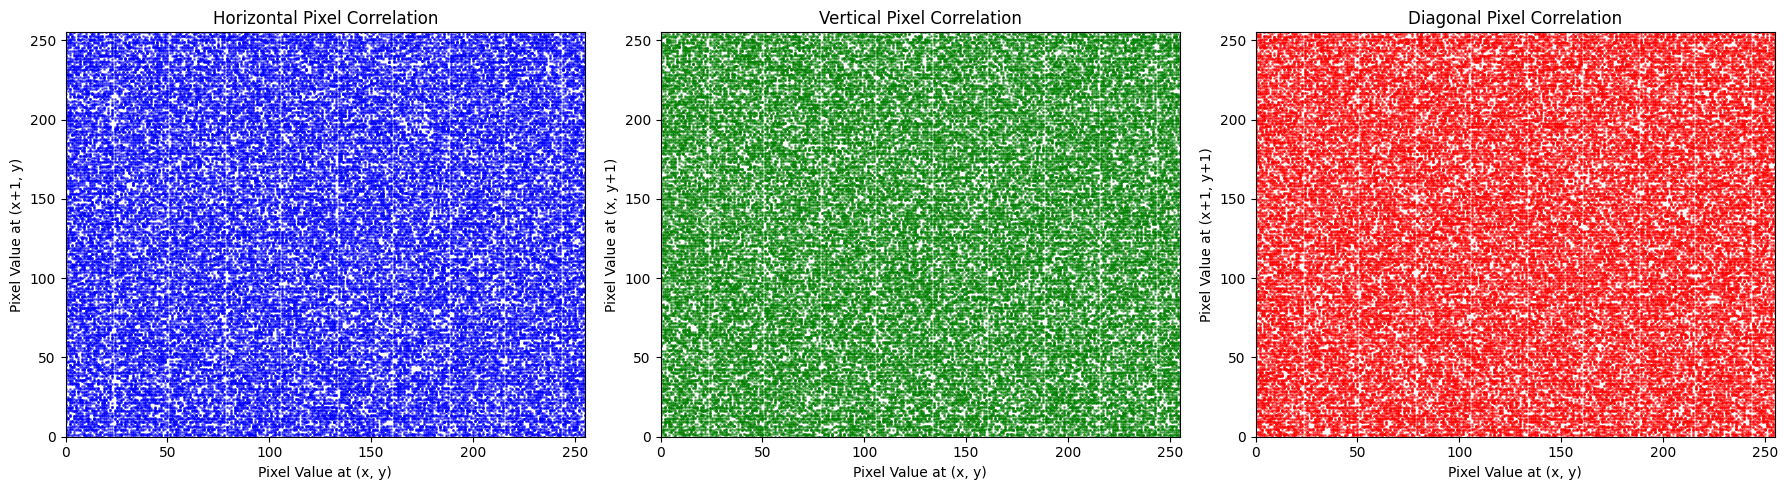

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def get_pixel_pairs(image_array, direction):
    """Get pixel pairs based on the specified direction."""
    pairs = []
    h, w = image_array.shape

    if direction == 'horizontal':
        for i in range(h):
            for j in range(w - 1):  # Exclude last column for horizontal pairs
                pairs.append((image_array[i, j], image_array[i, j + 1]))

    elif direction == 'vertical':
        for i in range(h - 1):  # Exclude last row for vertical pairs
            for j in range(w):
                pairs.append((image_array[i, j], image_array[i + 1, j]))

    elif direction == 'diagonal':
        for i in range(h - 1):  # Exclude last row and column for diagonal pairs
            for j in range(w - 1):
                pairs.append((image_array[i, j], image_array[i + 1, j + 1]))

    return pairs

def plot_pixel_correlations(image_path):
    """Plot pixel correlations in horizontal, vertical, and diagonal directions."""
    # Load and convert the image to grayscale
    image = Image.open(image_path).convert('L')
    image_array = np.array(image)

    # Extract pixel pairs for each direction
    horizontal_pairs = get_pixel_pairs(image_array, 'horizontal')
    vertical_pairs = get_pixel_pairs(image_array, 'vertical')
    diagonal_pairs = get_pixel_pairs(image_array, 'diagonal')

    # Separate pairs into x and y for plotting
    hor_x, hor_y = zip(*horizontal_pairs)
    ver_x, ver_y = zip(*vertical_pairs)
    diag_x, diag_y = zip(*diagonal_pairs)

    # Plot scatter plots
    plt.figure(figsize=(18, 5))

    # Horizontal correlation plot
    plt.subplot(1, 3, 1)
    plt.scatter(hor_x, hor_y, s=1, color='blue', alpha=0.5)
    plt.title('Horizontal Pixel Correlation')
    plt.xlabel('Pixel Value at (x, y)')
    plt.ylabel('Pixel Value at (x+1, y)')
    plt.xlim(0, 255)
    plt.ylim(0, 255)

    # Vertical correlation plot
    plt.subplot(1, 3, 2)
    plt.scatter(ver_x, ver_y, s=1, color='green', alpha=0.5)
    plt.title('Vertical Pixel Correlation')
    plt.xlabel('Pixel Value at (x, y)')
    plt.ylabel('Pixel Value at (x, y+1)')
    plt.xlim(0, 255)
    plt.ylim(0, 255)

    # Diagonal correlation plot
    plt.subplot(1, 3, 3)
    plt.scatter(diag_x, diag_y, s=1, color='red', alpha=0.5)
    plt.title('Diagonal Pixel Correlation')
    plt.xlabel('Pixel Value at (x, y)')
    plt.ylabel('Pixel Value at (x+1, y+1)')
    plt.xlim(0, 255)
    plt.ylim(0, 255)

    plt.tight_layout()
    plt.show()

# Example usage
plot_pixel_correlations('xor2.png')


Encryption complete. File saved at aes_encrypted_image.png


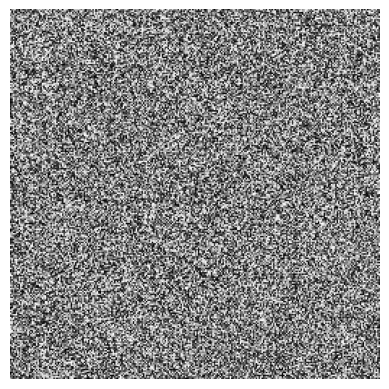

In [ ]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from PIL import Image
import numpy as np

def aes_encrypt_image(image_path, key, output_path):
    """
    Encrypts a scrambled grayscale image using AES encryption.

    Parameters:
    - image_path: Path to the scrambled grayscale image.
    - key: AES key for encryption (must be 16 bytes).
    - output_path: Path to save the AES encrypted image.
    """
    # Load the image and convert to grayscale
    image = Image.open(image_path).convert('L')

    # Convert the image to a numpy array (grayscale)
    image_matrix = np.array(image)

    # Flatten the image into a 1D array of bytes
    flattened_image = image_matrix.flatten()

    # Convert the flattened image to bytes
    image_bytes = bytes(flattened_image)

    # Initialize the AES cipher in ECB mode
    cipher = AES.new(key, AES.MODE_ECB)

    # Pad the image bytes to make the length a multiple of the AES block size (16 bytes)
    padded_image_bytes = pad(image_bytes, AES.block_size)

    # Encrypt the padded image bytes
    encrypted_image_bytes = cipher.encrypt(padded_image_bytes)

    # Convert the encrypted bytes back to a numpy array
    encrypted_image = np.frombuffer(encrypted_image_bytes, dtype=np.uint8)

    # Reshape the encrypted array back to the original image dimensions
    encrypted_image_matrix = encrypted_image[:image_matrix.size].reshape(image_matrix.shape)

    # Convert the encrypted matrix back to an image
    encrypted_image = Image.fromarray(encrypted_image_matrix)

    # Save the encrypted image
    encrypted_image.save(output_path)

    print(f"Encryption complete. File saved at {output_path}")

# Example usage:
aes_encrypt_image('xor_second_time.png', b'3424567890abcdef', 'aes_encrypted_image.png')
show_image('aes_encrypted_image.png')

In [ ]:
pip install pycryptodome

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 48.1 MB/s eta 0:00:00


In [ ]:
from PIL import Image
import numpy as np
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt

def apply_block_dct(image_path, block_size, output_dct_path="block_dct_image.png"):
    # Load the grayscale image and convert to a numpy array
    image = Image.open(image_path).convert('L')
    image_array = np.array(image)

    # Get the dimensions of the image
    h, w = image_array.shape

    # Create an array to store the DCT transformed blocks
    dct_image = np.zeros_like(image_array, dtype=float)

    # Loop over the image in block_size x block_size chunks
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            # Extract the block
            block = image_array[i:i+block_size, j:j+block_size]

            # Apply 2D DCT on the block
            dct_block = dct(dct(block.T, norm='ortho').T, norm='ortho')

            # Place the transformed block back into the DCT image array
            dct_image[i:i+block_size, j:j+block_size] = dct_block

    # Normalize the DCT image for visualization
    dct_image_normalized = np.clip((dct_image - np.min(dct_image)) / (np.max(dct_image) - np.min(dct_image)) * 255, 0, 255)
    dct_image_normalized = dct_image_normalized.astype(np.uint8)

    # Save the DCT image as PNG
    dct_image_png = Image.fromarray(dct_image_normalized)
    dct_image_png.save(output_dct_path)

    print(f"Block DCT complete. DCT-transformed image saved at {output_dct_path}")
    return dct_image

def apply_block_idct(dct_image, block_size=8, output_img_path="reconstructed_block_image.png"):
    # Get the dimensions of the DCT-transformed image
    h, w = dct_image.shape

    # Create an array to store the reconstructed blocks
    reconstructed_image = np.zeros_like(dct_image, dtype=float)

    # Loop over the DCT image in block_size x block_size chunks
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            # Extract the DCT block
            dct_block = dct_image[i:i+block_size, j:j+block_size]

            # Apply 2D IDCT on the block
            idct_block = idct(idct(dct_block.T, norm='ortho').T, norm='ortho')

            # Place the reconstructed block back into the image array
            reconstructed_image[i:i+block_size, j:j+block_size] = idct_block

    # Clip values to 0-255 and convert to uint8
    reconstructed_image = np.clip(reconstructed_image, 0, 255).astype(np.uint8)
    idct_image = Image.fromarray(reconstructed_image)
    idct_image.save(output_img_path)

    print(f"Block IDCT complete. Reconstructed image saved at {output_img_path}")
    plt.imshow(reconstructed_image, cmap='gray')
    plt.axis('off')
    plt.show()

# Example usage
# dct_image = apply_block_dct('xor_first_time.png', block_size=2, output_dct_path="block_dct_image.png")
# apply_block_idct(dct_image, block_size=8, output_img_path="reconstructed_block_image.png")


Block DCT complete. DCT-transformed image saved at block_dct_image.png


In [ ]:
import numpy as np
from PIL import Image
from scipy.fftpack import dct, idct

def apply_block_dct(image_path, output_dct_path, block_size=8, scaling_factor=0.7):
    """
    Applies block-based DCT to an image with scaling on high-frequency components.

    Parameters:
    - image_path: Path to the input grayscale image.
    - output_dct_path: Path to save the DCT-transformed image as PNG.
    - block_size: Size of the DCT block (e.g., 8x8).
    - scaling_factor: Factor to reduce high-frequency components in each block (0 < scaling_factor <= 1).
    """
    # Load image and convert to grayscale
    image = Image.open(image_path).convert('L')
    image_array = np.array(image)
    rows, cols = image_array.shape

    # Prepare an array to hold the transformed DCT image
    dct_image = np.zeros_like(image_array, dtype=np.float32)

    # Define a scaling mask that retains low-frequency components more strongly
    mask = np.ones((block_size, block_size)) * scaling_factor
    mask[:block_size//4, :block_size//4] = 1  # Keep low frequencies intact

    # Apply block-wise DCT and scaling
    for i in range(0, rows, block_size):
        for j in range(0, cols, block_size):
            # Extract the block
            block = image_array[i:i+block_size, j:j+block_size]

            # Apply 2D DCT on the block
            dct_block = dct(dct(block.T, norm='ortho').T, norm='ortho')

            # Apply the scaling mask
            dct_block *= mask

            # Store the transformed block back into the dct_image array
            dct_image[i:i+block_size, j:j+block_size] = dct_block

    # Normalize the DCT image for visualization and save as PNG
    dct_image_normalized = np.clip((dct_image - np.min(dct_image)) /
                                   (np.max(dct_image) - np.min(dct_image)) * 255, 0, 255).astype(np.uint8)
    dct_image_png = Image.fromarray(dct_image_normalized)
    dct_image_png.save(output_dct_path)

    print(f"Block DCT complete. Transformed image saved as PNG at {output_dct_path}")
    return dct_image

# Apply IDCT to reconstruct the image
def apply_block_idct(dct_image, output_img_path, block_size=8):
    """
    Applies block-based IDCT to reconstruct an image from DCT coefficients.

    Parameters:
    - dct_image: 2D array of DCT coefficients.
    - output_img_path: Path to save the reconstructed image.
    - block_size: Size of the DCT block (e.g., 8x8).
    """
    rows, cols = dct_image.shape
    reconstructed_image = np.zeros_like(dct_image)

    # Perform block-wise IDCT
    for i in range(0, rows, block_size):
        for j in range(0, cols, block_size):
            # Extract the DCT block
            dct_block = dct_image[i:i+block_size, j:j+block_size]

            # Apply 2D IDCT on the block
            idct_block = idct(idct(dct_block.T, norm='ortho').T, norm='ortho')

            # Store the reconstructed block back into the reconstructed_image array
            reconstructed_image[i:i+block_size, j:j+block_size] = idct_block

    # Clip values to 0-255 range and convert to uint8
    reconstructed_image = np.clip(reconstructed_image, 0, 255).astype(np.uint8)
    idct_image = Image.fromarray(reconstructed_image)
    idct_image.save(output_img_path)

    print(f"Block IDCT complete. Reconstructed image saved at {output_img_path}")

# Example usage
dct_image = apply_block_dct('bridge.png', 'dct_min_zero_block_image.png', block_size=2, scaling_factor=0.8)
apply_block_idct(dct_image, 'reconstructed_min_zero_block_image.png', block_size=2)



Block DCT complete. Transformed image saved as PNG at dct_min_zero_block_image.png
Block IDCT complete. Reconstructed image saved at reconstructed_min_zero_block_image.png
